In [1]:
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [33]:
df1=pd.read_csv("2014_Financial_Data.csv") 
df2=pd.read_csv("2015_Financial_Data.csv")
df3=pd.read_csv("2016_Financial_Data.csv")
df4=pd.read_csv("2017_Financial_Data.csv")
df5=pd.read_csv("2018_Financial_Data.csv")

In [34]:
df1['Year']=2014
df2['Year']=2015
df3['Year']=2016
df4['Year']=2017
df5['Year']=2018

In [35]:
### Drop the Stock Column
df1 = df1.drop(df1.columns[0], axis = 1) 
df2 = df2.drop(df2.columns[0], axis = 1)
df3 = df3.drop(df3.columns[0], axis = 1)
df4 = df4.drop(df4.columns[0], axis = 1)
df5 = df5.drop(df5.columns[0], axis = 1)

In [36]:
### Change Data Type
df1['Class'] = df1['Class'].astype(object)
df2['Class'] = df2['Class'].astype(object)
df3['Class'] = df3['Class'].astype(object)
df4['Class'] = df4['Class'].astype(object)
df5['Class'] = df5['Class'].astype(object)

In [37]:
df5['Class'] = df5['Class'].astype(object)
df1.rename(columns={"2015 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df2.rename(columns={"2016 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df3.rename(columns={"2017 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df4.rename(columns={"2018 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df5.rename(columns={"2019 PRICE VAR [%]": "PRICE_VAR"},inplace=True)

In [38]:
df1.drop(['Sector'], axis=1, inplace=True)
df2.drop(['Sector'], axis=1, inplace=True)
df3.drop(['Sector'], axis=1, inplace=True)
df4.drop(['Sector'], axis=1, inplace=True)
df5.drop(['Sector'], axis=1, inplace=True)
df1 = df1[df1['Class'].notna()]
df2 = df2[df2['Class'].notna()]
df3 = df3[df3['Class'].notna()]
df4 = df4[df4['Class'].notna()]
df5 = df5[df5['Class'].notna()]

In [39]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=20, weights='distance', metric='nan_euclidean', copy=True)

In [40]:
df1_clean = imputer.fit_transform(df1)
df1_clean = pd.DataFrame(df1_clean)
df1_clean.columns = list(df1)

In [41]:
df2_clean = imputer.fit_transform(df2)
df2_clean = pd.DataFrame(df2_clean)
df2_clean.columns = list(df2)
df3_clean = imputer.fit_transform(df3)
df3_clean = pd.DataFrame(df3_clean)
df3_clean.columns = list(df3)
df4_clean = imputer.fit_transform(df4)
df4_clean = pd.DataFrame(df4_clean)
df4_clean.columns = list(df4)
df5_clean = imputer.fit_transform(df5)
df5_clean = pd.DataFrame(df5_clean)
df5_clean.columns = list(df5)


In [42]:
data = pd.concat([df1_clean, df2_clean, df3_clean, df4_clean, df5_clean])

In [48]:
source=data
dataframe=source.pop('Class')
source['Class']=dataframe
source.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,PRICE_VAR,Year,Class
0,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,...,-0.018700,-0.021700,0.035900,0.031600,0.122800,0.0000,-0.1746,-9.323276,2014.0,0.0
1,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,0.090157,0.088497,0.101764,-0.031982,0.290933,1.6484,1.7313,-25.512193,2014.0,0.0
2,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,...,0.061800,0.098100,0.188600,0.326800,0.273800,0.0000,0.0234,33.118297,2014.0,1.0
3,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,...,0.021100,-0.051000,-0.018900,0.196300,-0.045800,0.0000,-0.0060,2.752291,2014.0,1.0
4,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,2.707700e+09,...,0.025700,0.009000,0.021500,0.027400,0.102500,0.0000,-0.0220,12.897715,2014.0,1.0


In [49]:
source[['Class']].groupby('Class').size()

Class
0.0     9044
1.0    10636
dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
trainingDataSet, evaluationDataSet = train_test_split(source, test_size = 0.2)
print(
    " Training data set : ",
     trainingDataSet.shape,
     "\n",
    "Evalutation data set : ",
    evaluationDataSet.shape
)

 Training data set :  (15744, 224) 
 Evalutation data set :  (3936, 224)


In [51]:
train=trainingDataSet.to_numpy()
test=evaluationDataSet.to_numpy()
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, train_y.shape,test_X.shape,test_y.shape)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape,test_X.shape,test_y.shape)

(15744, 223) (15744,) (3936, 223) (3936,)
(15744, 1, 223) (15744,) (3936, 1, 223) (3936,)


Epoch 1/50
219/219 - 7s - loss: 0.5906 - val_loss: 0.5150 - 7s/epoch - 30ms/step
Epoch 2/50
219/219 - 1s - loss: 0.4921 - val_loss: 0.4791 - 787ms/epoch - 4ms/step
Epoch 3/50
219/219 - 1s - loss: 0.4734 - val_loss: 0.4674 - 782ms/epoch - 4ms/step
Epoch 4/50
219/219 - 1s - loss: 0.4659 - val_loss: 0.4614 - 781ms/epoch - 4ms/step
Epoch 5/50
219/219 - 1s - loss: 0.4618 - val_loss: 0.4573 - 783ms/epoch - 4ms/step
Epoch 6/50
219/219 - 1s - loss: 0.4588 - val_loss: 0.4540 - 795ms/epoch - 4ms/step
Epoch 7/50
219/219 - 1s - loss: 0.4562 - val_loss: 0.4512 - 834ms/epoch - 4ms/step
Epoch 8/50
219/219 - 1s - loss: 0.4542 - val_loss: 0.4488 - 806ms/epoch - 4ms/step
Epoch 9/50
219/219 - 1s - loss: 0.4524 - val_loss: 0.4466 - 789ms/epoch - 4ms/step
Epoch 10/50
219/219 - 1s - loss: 0.4510 - val_loss: 0.4447 - 784ms/epoch - 4ms/step
Epoch 11/50
219/219 - 1s - loss: 0.4497 - val_loss: 0.4432 - 786ms/epoch - 4ms/step
Epoch 12/50
219/219 - 1s - loss: 0.4487 - val_loss: 0.4420 - 775ms/epoch - 4ms/step
Epo

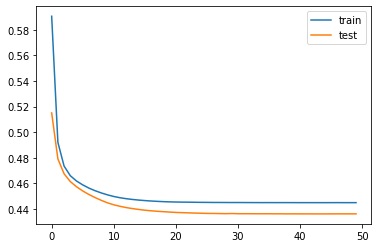

In [52]:
from keras.models import Sequential
import tensorflow
from keras.layers import LSTM,Dense
import matplotlib.pyplot as pyplot

model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [53]:
# make a prediction
from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error
print(test_X.shape)
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

(3936, 1, 223)
Test RMSE: 0.559


In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                54800     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 54,851
Trainable params: 54,851
Non-trainable params: 0
_________________________________________________________________


In [55]:
val = []
for i in inv_yhat:
  if i<0.5:
    val.append(0)
  else:
    val.append(1)
y_val = np.array(val)

In [56]:
import sklearn.metrics as sm
import numpy as np
from sklearn.metrics import classification_report
print(classification_report(y_val,inv_y))

              precision    recall  f1-score   support

           0       0.15      0.68      0.25       405
           1       0.94      0.57      0.71      3531

    accuracy                           0.58      3936
   macro avg       0.55      0.63      0.48      3936
weighted avg       0.86      0.58      0.66      3936



In [57]:
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true))*100/len(y_true)
print("Mean absolute error =", round(sm.mean_absolute_error(y_val,inv_y), 4))  
print("Mean squared error =", round(sm.mean_squared_error(y_val,inv_y), 4)) 
print("Root Mean squared error =", round(sm.mean_squared_error(y_val,inv_y,squared=False), 4)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val,inv_y),4)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val,inv_y), 4)) 
print("R2 score =", round(sm.r2_score(y_val,inv_y), 4))
print("mean_absolute_percentage_error =", round(mean_absolute_percentage_error(y_val,inv_y), 4))
print("Accuracy  =", round((1-mean_absolute_percentage_error(y_val,inv_y))*100, 4))

Mean absolute error = 0.4174
Mean squared error = 0.4174
Root Mean squared error = 0.6461
Median absolute error = 0.0
Explain variance score = -2.1846
R2 score = -3.5221
mean_absolute_percentage_error = nan
Accuracy  = nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import torch.utils.data as data_utils

In [60]:
train = data_utils.TensorDataset(torch.Tensor(np.array(trainingDataSet.drop(columns=['Class']))), torch.Tensor(np.array(trainingDataSet['Class'])))
train_loader = data_utils.DataLoader(train, batch_size = 150, shuffle = True)

In [62]:
test = data_utils.TensorDataset(torch.Tensor(np.array(evaluationDataSet.drop(columns=['Class']))), torch.Tensor(np.array(evaluationDataSet['Class'])))
test_loader = data_utils.DataLoader(test, batch_size = 150, shuffle = True)

In [63]:
for batch in train_loader:
    images, labels = batch 
    out = images   
print(out)               # Generate predictions

tensor([[ 3.0844e+09,  3.2260e-01,  1.5722e+09,  ...,  3.2890e-01,
          2.0511e+01,  2.0140e+03],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  6.3100e-01,
         -4.2228e+01,  2.0150e+03],
        [ 1.0736e+10,  1.9600e-02,  8.1630e+09,  ..., -1.0700e-01,
          4.4949e+01,  2.0180e+03],
        ...,
        [ 1.8660e+06,  8.5381e-02,  3.1890e+07,  ...,  2.2626e+00,
          1.9967e+00,  2.0150e+03],
        [ 1.3760e+08,  3.4680e-01,  0.0000e+00,  ...,  5.1210e-01,
          1.0881e+01,  2.0140e+03],
        [ 4.6240e+08,  8.6600e-02,  7.6280e+06,  ..., -1.7930e-01,
         -2.1339e+00,  2.0150e+03]])


In [64]:
class BankruptionClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        labels=labels.view(len(labels),1)
        loss = F.binary_cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)  
        #return {'val_loss': loss.detach(), 'val_acc': acc}
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)     # Generate predictions
        labels=labels.view(len(labels),1)
        loss = F.binary_cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [65]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [66]:
#SGD Plain Vannila
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [67]:
def plot_losses(train_loss,test_loss):
    losses_test = [x['val_loss'] for x in test_loss]
    losses_train = [x['val_loss'] for x in train_loss]
    plt.plot(losses_test, '-x',label='Test Loss')
    plt.plot(losses_train, '--',label='Training Loss')
    plt.legend(["Test Loss", "Training Loss"], loc ="lower right") 
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs');

In [68]:
def plot_accuracies(test_accuracy,train_accuracy):
    accuracy_test = [x['val_acc'] for x in test_accuracy]
    accuracy_train = [x['val_acc'] for x in train_accuracy]
    plt.plot(accuracy_test, '-x',label='Test Accuracy')
    plt.plot(accuracy_train, '--',label='Training Accuracy')
    plt.legend(["Test Accuracy", "Training Accuracy"], loc ="lower right") 
    plt.xlabel('epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [73]:
#Actual Model
class BankruptionIdentification(BankruptionClassificationBase):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(223, 150)
        self.linear2 = nn.Linear(150, 30)
        self.linear3 = nn.Linear(30, 1)
        #            layers.Dense(1, activation="sigmoid")(x)
    def forward(self, xb):
        # Max pooling over a (2, 2) window
        #print(self.num_flat_features(xb))
        xb = F.relu(self.linear1(xb))
        xb = F.relu(self.linear2(xb))
        xb = F.sigmoid(self.linear3(xb))
        return xb

In [75]:
model=BankruptionIdentification()
model1=BankruptionIdentification()

In [71]:
print(model)

BankruptionIdentification(
  (linear1): Linear(in_features=95, out_features=3000, bias=True)
  (linear2): Linear(in_features=3000, out_features=30, bias=True)
  (linear3): Linear(in_features=30, out_features=1, bias=True)
)


In [76]:
evaluate(model, test_loader)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


{'val_acc': 66.22222137451172, 'val_loss': 54.378597259521484}

In [77]:
history = [evaluate(model, test_loader)]
history_train=[evaluate(model1, train_loader)]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [78]:
history = [evaluate(model, test_loader)]
history_train=[evaluate(model1, train_loader)]
history += fit(10, 1e-1, model, train_loader, test_loader)
history_train += fit(10, 1e-1, model1, train_loader, train_loader)
history += fit(10, 1e-2, model, train_loader, test_loader)
history_train += fit(10, 1e-2, model1, train_loader, train_loader)
history += fit(10, 1e-3, model, train_loader, test_loader)
history_train += fit(10, 1e-3, model1, train_loader, train_loader)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch [0], val_loss: 54.8354, val_acc: 66.2222
Epoch [1], val_loss: 54.4444, val_acc: 66.2222
Epoch [2], val_loss: 54.6008, val_acc: 66.2222
Epoch [3], val_loss: 54.3663, val_acc: 66.2222
Epoch [4], val_loss: 54.9918, val_acc: 66.2222
Epoch [5], val_loss: 54.3663, val_acc: 66.2222
Epoch [6], val_loss: 54.1317, val_acc: 66.2222
Epoch [7], val_loss: 54.3663, val_acc: 66.2222
Epoch [8], val_loss: 54.6008, val_acc: 66.2222
Epoch [9], val_loss: 54.5226, val_acc: 66.2222
Epoch [0], val_loss: 45.6926, val_acc: 69.1048
Epoch [1], val_loss: 45.6939, val_acc: 69.1048
Epoch [2], val_loss: 45.6926, val_acc: 69.1048
Epoch [3], val_loss: 45.6960, val_acc: 69.1048
Epoch [4], val_loss: 45.6902, val_acc: 69.1048
Epoch [5], val_loss: 45.6929, val_acc: 69.1048
Epoch [6], val_loss: 45.6915, val_acc: 69.1048
Epoch [7], val_loss: 45.6966, val_acc: 69.1048
Epoch [8], val_loss: 45.6968, val_acc: 69.1048
Epoch [9], val_loss: 45.6894, val_acc: 69.1048
Epoch [0], val_loss: 54.5226, val_acc: 66.2222
Epoch [1], va

In [79]:
evaluate(model, test_loader)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


{'val_acc': 66.22222137451172, 'val_loss': 55.14814758300781}

In [80]:
evaluate(model1, test_loader)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


{'val_acc': 66.22222137451172, 'val_loss': 45.00822830200195}

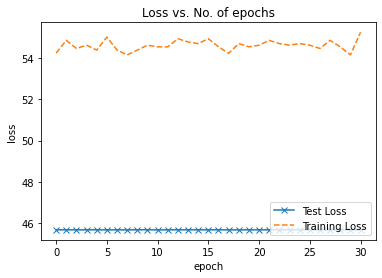

In [81]:
plot_losses(history,history_train)

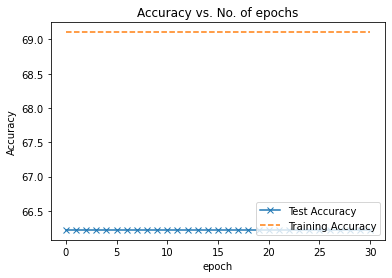

In [82]:
plot_accuracies(history,history_train)

In [83]:
Y_Probability=[]
Y_Actual=[]
for batch in test_loader:
   img,label=batch
   try:
    outputs2=model(img)
    if len(Y_Probability)==0:
        _,pred = torch.max(outputs2, 1)
        Y_Probability=pred.detach().numpy()
        Y_Actual=label.detach().numpy()
    else:
       if len(outputs2.detach().numpy()[:,-1])==len(label.detach().numpy()):
           _,pred = torch.max(outputs2, 1)
           pred=pred.detach().numpy()
           Y_Actual=np.append(Y_Actual,label.detach().numpy())        #print('hihi')
           Y_Probability=np.append(Y_Probability, pred)
   except:
       print('skipped')
        
from sklearn.metrics import classification_report
print(classification_report(Y_Actual, Y_Probability))

              precision    recall  f1-score   support

         0.0       0.45      1.00      0.62      1788
         1.0       0.00      0.00      0.00      2148

    accuracy                           0.45      3936
   macro avg       0.23      0.50      0.31      3936
weighted avg       0.21      0.45      0.28      3936



/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and bein

In [84]:
import sklearn.metrics as sm
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true))*100/len(y_true)
print("Mean absolute error =", round(sm.mean_absolute_error(Y_Probability, Y_Actual), 4))  
print("Mean squared error =", round(sm.mean_squared_error(Y_Probability, Y_Actual), 4)) 
print("Root Mean squared error =", round(sm.mean_squared_error(Y_Probability, Y_Actual,squared=False), 4)) 
print("Median absolute error =", round(sm.median_absolute_error(Y_Probability, Y_Actual),4)) 
print("Explain variance score =", round(sm.explained_variance_score(Y_Probability, Y_Actual), 4)) 
print("R2 score =", round(sm.r2_score(Y_Probability, Y_Actual), 4))
print("mean_absolute_percentage_error =", round(mean_absolute_percentage_error(Y_Probability, Y_Actual), 4))
print("Accuracy  =", round((1-mean_absolute_percentage_error(Y_Probability, Y_Actual))*100, 4))

Mean absolute error = 0.5457
Mean squared error = 0.5457
Root Mean squared error = 0.7387
Median absolute error = 1.0
Explain variance score = 0.0
R2 score = 0.0
mean_absolute_percentage_error = nan
Accuracy  = nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


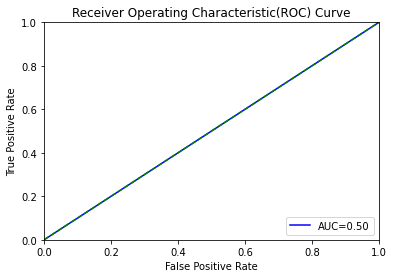

In [85]:
#ROC Curve.
import sklearn.metrics as metrics
flse,true,thres = metrics.roc_curve(Y_Actual, Y_Probability)
roc_curve = metrics.auc(flse, true)
prec,recall,thres = metrics.precision_recall_curve(Y_Actual, Y_Probability)

plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.plot(flse, true, 'b', label ='AUC=%0.2f' % roc_curve)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

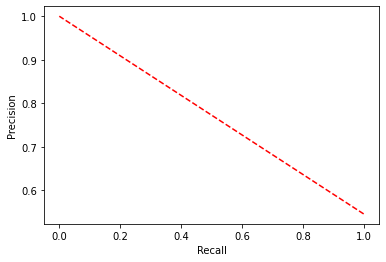

In [86]:
#Precision Recall curve.
fig, axis = plt.subplots()
axis.plot(recall,prec,'k--',color='red')
axis.set_xlabel("Recall")
axis.set_ylabel("Precision")
plt.savefig('fig.jpg')
fig.show()

In [87]:
#SGD with momentum
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr, momentum=0.9)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [88]:
history = [evaluate(model, test_loader)]
history_train=[evaluate(model1, train_loader)]
history += fit(10, 1e-1, model, train_loader, test_loader)
history_train += fit(10, 1e-1, model1, train_loader, train_loader)
history += fit(10, 1e-2, model, train_loader, test_loader)
history_train += fit(10, 1e-2, model1, train_loader, train_loader)
history += fit(10, 1e-3, model, train_loader, test_loader)
history_train += fit(10, 1e-3, model1, train_loader, train_loader)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch [0], val_loss: 54.4444, val_acc: 66.2222
Epoch [1], val_loss: 54.5226, val_acc: 66.2222
Epoch [2], val_loss: 54.3663, val_acc: 66.2222
Epoch [3], val_loss: 54.4444, val_acc: 66.2222
Epoch [4], val_loss: 54.6008, val_acc: 66.2222
Epoch [5], val_loss: 54.3663, val_acc: 66.2222
Epoch [6], val_loss: 54.3663, val_acc: 66.2222
Epoch [7], val_loss: 54.6008, val_acc: 66.2222
Epoch [8], val_loss: 54.6790, val_acc: 66.2222
Epoch [9], val_loss: 54.7572, val_acc: 66.2222
Epoch [0], val_loss: 45.6934, val_acc: 69.1048
Epoch [1], val_loss: 45.6952, val_acc: 69.1048
Epoch [2], val_loss: 45.6899, val_acc: 69.1048
Epoch [3], val_loss: 45.6960, val_acc: 69.1048
Epoch [4], val_loss: 45.6939, val_acc: 69.1048
Epoch [5], val_loss: 45.6936, val_acc: 69.1048
Epoch [6], val_loss: 45.6939, val_acc: 69.1048
Epoch [7], val_loss: 45.6937, val_acc: 69.1048
Epoch [8], val_loss: 45.6934, val_acc: 69.1048
Epoch [9], val_loss: 45.6950, val_acc: 69.1048
Epoch [0], val_loss: 54.6008, val_acc: 66.2222
Epoch [1], va

In [89]:
Y_Probability=[]
Y_Actual=[]
for batch in test_loader:
   img,label=batch
   try:
    outputs2=model(img)
    if len(Y_Probability)==0:
        _,pred = torch.max(outputs2, 1)
        Y_Probability=pred.detach().numpy()
        Y_Actual=label.detach().numpy()
    else:
       if len(outputs2.detach().numpy()[:,-1])==len(label.detach().numpy()):
           _,pred = torch.max(outputs2, 1)
           pred=pred.detach().numpy()
           Y_Actual=np.append(Y_Actual,label.detach().numpy())        #print('hihi')
           Y_Probability=np.append(Y_Probability, pred)
   except:
       print('skipped')
        
from sklearn.metrics import classification_report
print(classification_report(Y_Actual, Y_Probability))

              precision    recall  f1-score   support

         0.0       0.45      1.00      0.62      1788
         1.0       0.00      0.00      0.00      2148

    accuracy                           0.45      3936
   macro avg       0.23      0.50      0.31      3936
weighted avg       0.21      0.45      0.28      3936



/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and bein

In [90]:
import sklearn.metrics as sm
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true))*100/len(y_true)
print("Mean absolute error =", round(sm.mean_absolute_error(Y_Probability, Y_Actual), 4))  
print("Mean squared error =", round(sm.mean_squared_error(Y_Probability, Y_Actual), 4)) 
print("Root Mean squared error =", round(sm.mean_squared_error(Y_Probability, Y_Actual,squared=False), 4)) 
print("Median absolute error =", round(sm.median_absolute_error(Y_Probability, Y_Actual),4)) 
print("Explain variance score =", round(sm.explained_variance_score(Y_Probability, Y_Actual), 4)) 
print("R2 score =", round(sm.r2_score(Y_Probability, Y_Actual), 4))
print("mean_absolute_percentage_error =", round(mean_absolute_percentage_error(Y_Probability, Y_Actual), 4))
print("Accuracy  =", round((1-mean_absolute_percentage_error(Y_Probability, Y_Actual))*100, 4))

Mean absolute error = 0.5457
Mean squared error = 0.5457
Root Mean squared error = 0.7387
Median absolute error = 1.0
Explain variance score = 0.0
R2 score = 0.0
mean_absolute_percentage_error = nan
Accuracy  = nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [91]:
#RNN Model
class BankruptionIdentification(BankruptionClassificationBase):
    def __init__(self):
        super().__init__()
        self.hidden_dim = 3000
        self.n_layers = 1
        self.rnn = nn.RNN(95, self.hidden_dim, self.n_layers, batch_first=True)   
        # Fully connected layer
        self.fc = nn.Linear(3000, 1)

    def forward(self, xb):
        # Max pooling over a (2, 2) window
        #print(self.num_flat_features(xb))
        hidden = self.init_hidden(batch_size=len(xb))
        # Passing in the input and hidden state into the model and obtaining outputs
        xb=xb.resize_((len(xb),1,95))
        #print(xb.size())
        out, hidden = self.rnn(xb, hidden)
        #print(out.size())
        # Reshaping the outputs such that it can be fit into the fully connected layer
        out = out.contiguous().view(-1, self.hidden_dim)
        out = F.sigmoid(self.fc(out))
        return out
    
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        # We'll send the tensor holding the hidden state to the device we specified earlier as well
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
        return hidden

In [92]:
#SGD Plain Vannila
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [93]:
model = BankruptionIdentification()
model1=BankruptionIdentification()
history = [evaluate(model, test_loader)]
history_train=[evaluate(model1, train_loader)]
history += fit(10, 1e-1, model, train_loader, test_loader)
history_train += fit(10, 1e-1, model1, train_loader, train_loader)
history += fit(10, 1e-2, model, train_loader, test_loader)
history_train += fit(10, 1e-2, model1, train_loader, train_loader)
history += fit(10, 1e-3, model, train_loader, test_loader)
history_train += fit(10, 1e-3, model1, train_loader, train_loader)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch [0], val_loss: 1.2429, val_acc: 66.2222
Epoch [1], val_loss: 0.9283, val_acc: 66.2222
Epoch [2], val_loss: 1.2552, val_acc: 66.2222
Epoch [3], val_loss: 1.0747, val_acc: 66.2222
Epoch [4], val_loss: 1.3599, val_acc: 66.2222
Epoch [5], val_loss: 1.1413, val_acc: 66.2222
Epoch [6], val_loss: 1.1540, val_acc: 66.2222
Epoch [7], val_loss: 1.2793, val_acc: 66.2222
Epoch [8], val_loss: 1.5344, val_acc: 66.2222
Epoch [9], val_loss: 1.0016, val_acc: 66.2222
Epoch [0], val_loss: 1.2113, val_acc: 69.1048
Epoch [1], val_loss: 1.2145, val_acc: 69.1048
Epoch [2], val_loss: 1.2097, val_acc: 69.1048
Epoch [3], val_loss: 1.0755, val_acc: 69.1048
Epoch [4], val_loss: 1.4492, val_acc: 69.1048
Epoch [5], val_loss: 1.1570, val_acc: 69.1048
Epoch [6], val_loss: 1.8257, val_acc: 69.1048
Epoch [7], val_loss: 1.1925, val_acc: 69.1048
Epoch [8], val_loss: 1.3138, val_acc: 69.1048
Epoch [9], val_loss: 1.7501, val_acc: 69.1048
Epoch [0], val_loss: 0.8099, val_acc: 66.2222
Epoch [1], val_loss: 0.7817, val_a

In [94]:
print(model)

BankruptionIdentification(
  (rnn): RNN(95, 3000, batch_first=True)
  (fc): Linear(in_features=3000, out_features=1, bias=True)
)


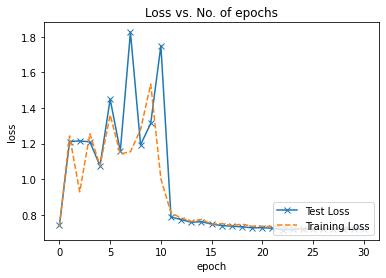

In [95]:
plot_losses(history,history_train)

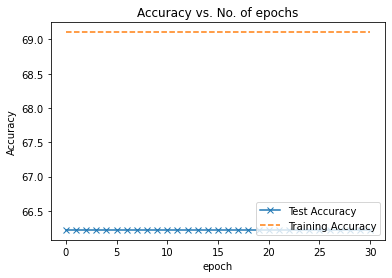

In [96]:
plot_accuracies(history,history_train)

In [97]:
Y_Probability=[]
Y_Actual=[]
for batch in test_loader:
   img,label=batch
   try:
    outputs2=model(img)
    if len(Y_Probability)==0:
        _,pred = torch.max(outputs2, 1)
        Y_Probability=pred.detach().numpy()
        Y_Actual=label.detach().numpy()
    else:
       if len(outputs2.detach().numpy()[:,-1])==len(label.detach().numpy()):
           _,pred = torch.max(outputs2, 1)
           pred=pred.detach().numpy()
           Y_Actual=np.append(Y_Actual,label.detach().numpy())        #print('hihi')
           Y_Probability=np.append(Y_Probability, pred)
   except:
       print('skipped')
        
from sklearn.metrics import classification_report
print(classification_report(Y_Actual, Y_Probability))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


              precision    recall  f1-score   support

         0.0       0.45      1.00      0.62      1788
         1.0       0.00      0.00      0.00      2148

    accuracy                           0.45      3936
   macro avg       0.23      0.50      0.31      3936
weighted avg       0.21      0.45      0.28      3936



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
import sklearn.metrics as sm
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true))*100/len(y_true)
print("Mean absolute error =", round(sm.mean_absolute_error(Y_Probability, Y_Actual), 4))  
print("Mean squared error =", round(sm.mean_squared_error(Y_Probability, Y_Actual), 4)) 
print("Root Mean squared error =", round(sm.mean_squared_error(Y_Probability, Y_Actual,squared=False), 4)) 
print("Median absolute error =", round(sm.median_absolute_error(Y_Probability, Y_Actual),4)) 
print("Explain variance score =", round(sm.explained_variance_score(Y_Probability, Y_Actual), 4)) 
print("R2 score =", round(sm.r2_score(Y_Probability, Y_Actual), 4))
print("mean_absolute_percentage_error =", round(mean_absolute_percentage_error(Y_Probability, Y_Actual), 4))
print("Accuracy  =", round((1-mean_absolute_percentage_error(Y_Probability, Y_Actual))*100, 4))

Mean absolute error = 0.5457
Mean squared error = 0.5457
Root Mean squared error = 0.7387
Median absolute error = 1.0
Explain variance score = 0.0
R2 score = 0.0
mean_absolute_percentage_error = nan
Accuracy  = nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
